In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline

In [92]:
data = pd.read_excel('df.xlsx')

In [93]:
data.head()

,patid,treatment,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
0,241,No Meds,795.9965,602.492,72.194
1,87,No Meds,360.1585,205.983,43.959
2,271,No Meds,889.8935,573.223,77.753
3,102,No Meds,851.7900,147.045,29.820
4,305,No Meds,641.2610,598.762,190.214


In [30]:
# Convert treatment to factor
codes, uniques = pd.factorize(data['treatment'])
data['treatment'] = codes 

In [28]:
data.describe()

,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
count,41.000000,41.000000,41.000000
mean,1995.876476,632.437780,249.205634
std,2940.253551,372.901707,350.542039
min,359.580000,13.571000,17.531000
25%,476.112000,256.231000,53.746000
50%,851.790000,644.552000,100.206000
75%,1874.489500,1050.216000,226.571000
max,15063.394000,1167.381000,1565.362000


In [41]:
data1 = data.drop(['treatment','patid'],axis=1)

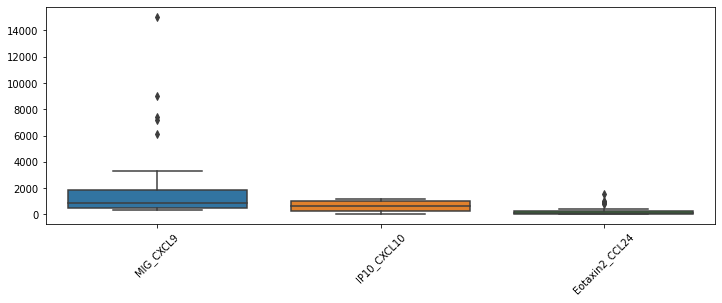

In [42]:
# plot some data
fig,ax = plt.subplots(1,figsize=(12,4))
ax = sns.boxplot(data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [43]:
data1.keys()

Index(['MIG_CXCL9', 'IP10_CXCL10', 'Eotaxin2_CCL24'], dtype='object')

In [44]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data1.keys()


# z-score (written out for clarity)
for col in cols2zscore:
  meanval   = data1[col].mean()
  stdev     = data1[col].std()
  data1[col] = (data1[col]-meanval) / stdev

data1.describe()

,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
count,4.100000e+01,4.100000e+01,4.100000e+01
mean,-2.000432e-16,7.582011e-17,-4.874150e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.565154e-01,-1.659598e+00,-6.609040e-01
25%,-5.168821e-01,-1.008863e+00,-5.575926e-01
50%,-3.891115e-01,3.248636e-02,-4.250550e-01
75%,-4.128453e-02,1.120344e+00,-6.457038e-02
max,4.444351e+00,1.434542e+00,3.754632e+00


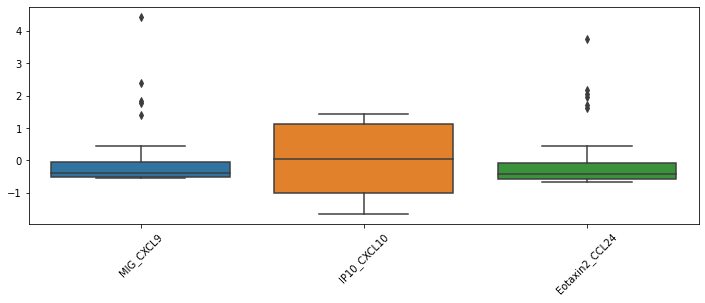

In [45]:
# check the plot again
fig,ax = plt.subplots(1,figsize=(12,4))
ax = sns.boxplot(data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Wired value

In [103]:
data[data1['MIG_CXCL9']>3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,patid,treatment,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24


In [48]:
data[data1['Eotaxin2_CCL24']>3]

,patid,treatment,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
26,45,1,7203.9875,1050.216,1565.362


Outliers

In [49]:
data[data1['MIG_CXCL9']>1]

,patid,treatment,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
26,45,1,7203.9875,1050.216,1565.362
27,296,1,7383.0465,1050.252,1008.631
29,29,1,6146.4285,1119.739,346.990
32,313,1,8985.8685,1065.926,235.235
33,443,1,15063.3940,1085.431,851.790


In [50]:
data[data1['Eotaxin2_CCL24']>1]

,patid,treatment,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
23,190,1,2038.9965,1155.733,971.634
26,45,1,7203.9875,1050.216,1565.362
27,296,1,7383.0465,1050.252,1008.631
33,443,1,15063.3940,1085.431,851.790
38,191,1,1873.3485,1084.600,938.352
40,106,1,1638.7850,910.452,819.316


Seperate by group

In [51]:
df_control = data1.loc[data['treatment']==0]
df_control

,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
0,-0.408087,-0.080305,-0.504965
1,-0.556319,-1.143612,-0.585512
2,-0.376152,-0.158795,-0.489107
3,-0.389112,-1.301664,-0.625847
4,-0.460714,-0.090307,-0.168287
5,0.096116,1.434542,0.204559
6,-0.516882,-0.215987,-0.452575
7,-0.556515,-1.214673,-0.634944
8,-0.489144,0.132119,-0.631969
9,0.432006,0.362214,-0.189075


In [52]:
df_trt = data1.loc[data['treatment']==1]

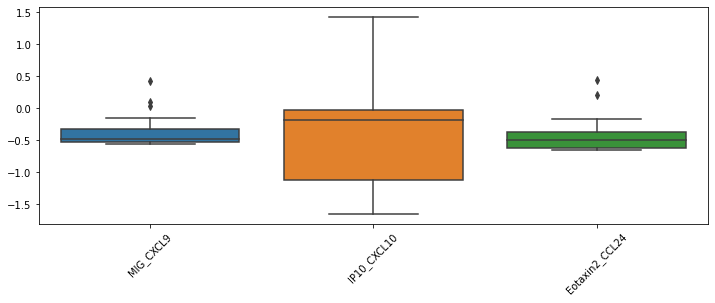

In [53]:
# check the plot with control group
fig,ax = plt.subplots(1,figsize=(12,4))
ax = sns.boxplot(data=df_control)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

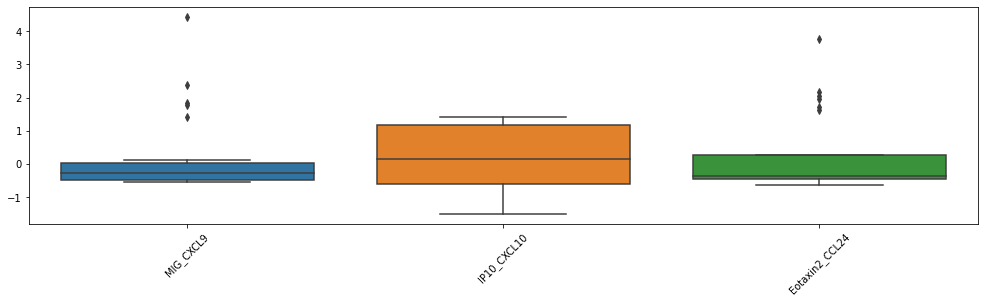

In [54]:
# check the plot with treatment group
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=df_trt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [75]:
df_trt[df_trt['MIG_CXCL9']>3]

,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
33,4.444351,1.214779,1.719007


In [76]:
df_trt[df_trt['Eotaxin2_CCL24']>3]

,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
26,1.771314,1.120344,3.754632


In [77]:
# Seperate still same as before, we can remove these two points for now to get a new dataset

In [99]:
data.drop(data[data1['Eotaxin2_CCL24']>3].index,inplace=True)

In [100]:
data.drop(data[data1['MIG_CXCL9']>3].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [102]:
# Reset index
data.reset_index()

,index,patid,treatment,MIG_CXCL9,IP10_CXCL10,Eotaxin2_CCL24
0,0,241,No Meds,795.9965,602.492,72.194
1,1,87,No Meds,360.1585,205.983,43.959
2,2,271,No Meds,889.8935,573.223,77.753
3,3,102,No Meds,851.7900,147.045,29.820
4,4,305,No Meds,641.2610,598.762,190.214
5,5,53,No Meds,2278.4815,1167.381,320.912
6,6,415,No Meds,476.1120,551.896,90.559
7,7,365,No Meds,359.5800,179.484,26.631
8,8,67,No Meds,557.6690,681.705,27.674
9,9,011a,No Meds,3266.0845,767.508,182.927


# Classification

In [129]:
import random 
random.seed(666)

## 1. Random Forest for Binary Classification

In [130]:
# No standardize for random forest
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot

In [131]:
X = data[['MIG_CXCL9','IP10_CXCL10','Eotaxin2_CCL24']]

In [132]:
y = data['treatment']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4166666666666667


#### 1.2 Cross-validation

In [134]:
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.600 (0.233)


#### 1.3 Hyperparameter tuning

#### (1) Explore number of samples

>0.1 0.575 (0.222)
>0.2 0.608 (0.243)
>0.3 0.642 (0.234)
>0.4 0.625 (0.216)
>0.5 0.625 (0.260)
>0.6 0.636 (0.260)
>0.7 0.644 (0.260)
>0.8 0.608 (0.225)
>0.9 0.617 (0.234)
>1.0 0.597 (0.232)


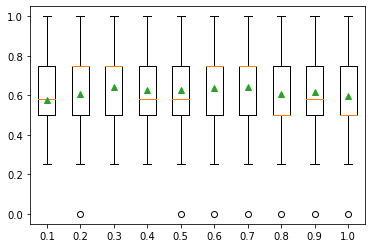

In [135]:
# get a list of models to evaluate
from numpy import arange
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# evaluate the models and store results
models = get_models()
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### (2) Explore number of trees

>10 0.614 (0.249)
>50 0.608 (0.215)
>100 0.608 (0.234)
>500 0.611 (0.235)
>1000 0.581 (0.220)


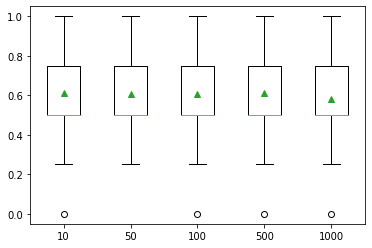

In [136]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### (3) Explore tree depth

>1 0.658 (0.241)
>2 0.547 (0.220)
>3 0.567 (0.236)
>4 0.592 (0.241)
>5 0.575 (0.229)
>6 0.606 (0.224)
>7 0.600 (0.205)
>None 0.575 (0.247)


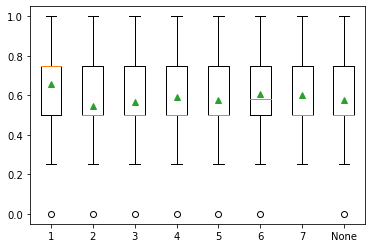

In [137]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
  
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### (4) Random Search

In [138]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


In [139]:
model = RandomForestClassifier(n_estimators=400, min_samples_leaf=4, min_samples_split=2, max_features='sqrt',max_depth=10, bootstrap=True)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.575 (0.238)


---

## 2. K-Nearest Neighbors

In [140]:
# Normalization is required for KNN

In [142]:
from sklearn import preprocessing
X_normal = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.3) # 70% training and 30% test

In [145]:
 from sklearn.model_selection import GridSearchCV
 from sklearn.neighbors import KNeighborsClassifier
parameters = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [146]:
print(gridsearch.best_estimator_)

KNeighborsClassifier(n_neighbors=7)


In [149]:
# Use the KNN classifier to fit data:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[6 0]
 [3 3]]
              precision    recall  f1-score   support

        Meds       0.67      1.00      0.80         6
     No Meds       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

0.75


In [147]:
model = KNeighborsClassifier(n_neighbors=7)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_normal, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.196)


# 3. Naive Bayes

In [150]:
from sklearn import preprocessing
X_normal = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.3) 

In [151]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [152]:
print(ac)

0.6666666666666666


In [153]:
model = GaussianNB()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_normal, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.458 (0.202)


# 4. Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.556 (0.258)


In [157]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.556 (0.258)


# 5. Support Vector Machine

In [162]:
# Standardize before processing 
scaler = preprocessing.StandardScaler().fit(X)
X_scale = scaler.transform(X)

In [164]:
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size = 0.30, random_state = 1)

In [166]:
# defining parameter range
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 1000),'kernel': ['linear','poly','rbf','sigmoid']}
 
grid = RandomizedSearchCV(SVC(), param_distributions, refit = True, verbose = 1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 318.5040283486502, 'gamma': 0.040977458870077726, 'kernel': 'linear'}
SVC(C=318.5040283486502, gamma=0.040977458870077726, kernel='linear')
              precision    recall  f1-score   support

        Meds       1.00      0.30      0.46        10
     No Meds       0.22      1.00      0.36         2

    accuracy                           0.42        12
   macro avg       0.61      0.65      0.41        12
weighted avg       0.87      0.42      0.45        12

0.4166666666666667


In [167]:
model = SVC()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.550 (0.159)


# 6. LightGBM

In [172]:
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
pd.options.display.max_columns = 999

In [170]:
# Standardize before processing 
scaler = preprocessing.StandardScaler().fit(X)
X_scale = scaler.transform(X)
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size = 0.30, random_state = 1)

In [178]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_scale, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.592 (0.115)


#### Hyperparameter Tuning

#### (1) Explore Number of Trees

>1 0.592 (0.115)
>3 0.592 (0.115)
>5 0.592 (0.115)
>7 0.592 (0.115)
>8 0.592 (0.115)
>9 0.592 (0.115)


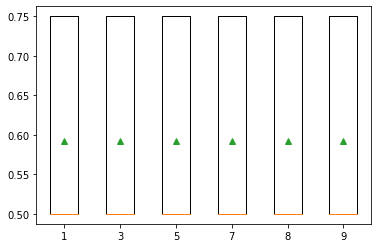

In [181]:
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [1, 3, 5, 7, 8, 9]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### (2) Explore Depth of Trees

>1 0.592 (0.115)
>2 0.592 (0.115)
>3 0.592 (0.115)
>4 0.592 (0.115)
>5 0.592 (0.115)
>6 0.592 (0.115)
>7 0.592 (0.115)
>8 0.592 (0.115)
>9 0.592 (0.115)
>10 0.592 (0.115)


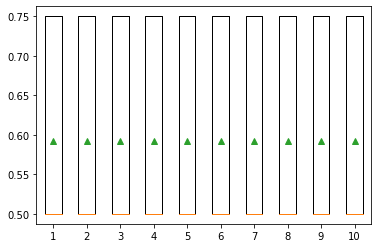

In [182]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### (3) Explore Learning Rate

>0.0001 0.592 (0.115)
>0.0010 0.592 (0.115)
>0.0100 0.592 (0.115)
>0.1000 0.592 (0.115)
>1.0000 0.592 (0.115)


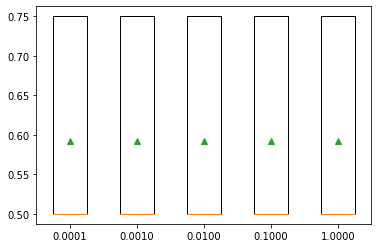

In [183]:
# get a list of models to evaluate
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = LGBMClassifier(learning_rate=r)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_scale, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### (4) Explore Boosting Type

>gbdt 0.592 (0.115)
>dart 0.592 (0.115)
>goss 0.592 (0.115)


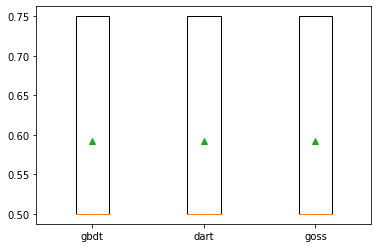

In [184]:
# get a list of models to evaluate
def get_models():
	models = dict()
	types = ['gbdt', 'dart', 'goss']
	for t in types:
		models[t] = LGBMClassifier(boosting_type=t)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()